<a href="https://colab.research.google.com/github/Olesiewitch/Predictive_Analytics/blob/master/APA_Hilstrom_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**
We use the classic Hillstrom dataset for application in **CausalML** and **PyLift** Packages. 

**Brief data description:**  
Data set contains 64,000 customers who last purchased within 12 months. In an e-mail test, customers were randomly chosen to receive Mens, Womens merchandise e-mail campaign, or No campaign at all (Control group).

First, let's have a quick look at the dataset.

# **Explanatory data analysis**

In [0]:
# Main imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})


In [0]:
# Read data

dataurl='https://raw.githubusercontent.com/Olesiewitch/Predictive_Analytics/master/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv'
df=pd.read_csv(dataurl)

In [19]:
df.keys()

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend'],
      dtype='object')

In [20]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


The variables are defined as the following: 

*   Recency: Months since last purchase.
*   history_segment: Categorization of dollars spent in the past year.
*   history: Actual dollar value spent in the past year.
*   mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
*   womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
*   zip_code: Classifies zip code as Urban, Suburban, or Rural.
*   newbie: 1/0 indicator, 1 = New customer in the past twelve months.
*   channel: Describes the channels the customer purchased from in the past year.
*   segment: Mens E-Mail, Womens E-Mail, No E-Mail
*   visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.
*   conversion:  1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
*   spend: Actual dollars spent in the following two weeks.







In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


In [0]:
def generate_feature_repr(values):
  feature_names = list(set(values))
  feature_names.sort()
  feature_values = []
  for feature_name in feature_names:
      value = values[values==feature_name].shape[0]
      feature_values.append(value)
  return pd.DataFrame(data={
      'Name': feature_names,
      'Value':feature_values
  })

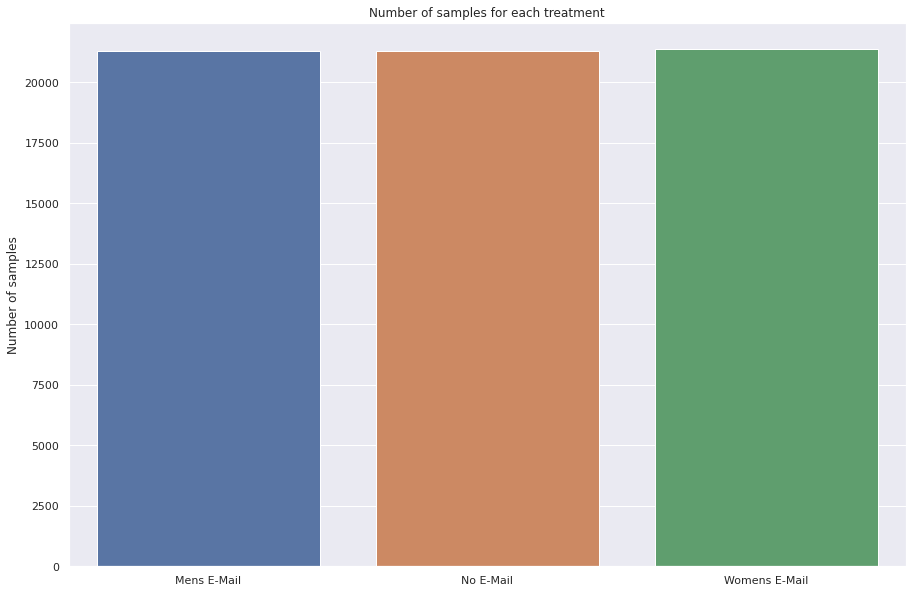

In [0]:
df_repr= generate_feature_repr(df['segment'])
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='Number of samples',
    title='Number of samples for each treatment'
);

In [0]:
# Inspect Target Variable
# Target variable -spend

target=df['spend']
non_zero = target[target !=0].shape[0]

print("{}% - of samples actually spent". format(100 * non_zero / target.shape[0]))


0.903125% - of samples actually spent


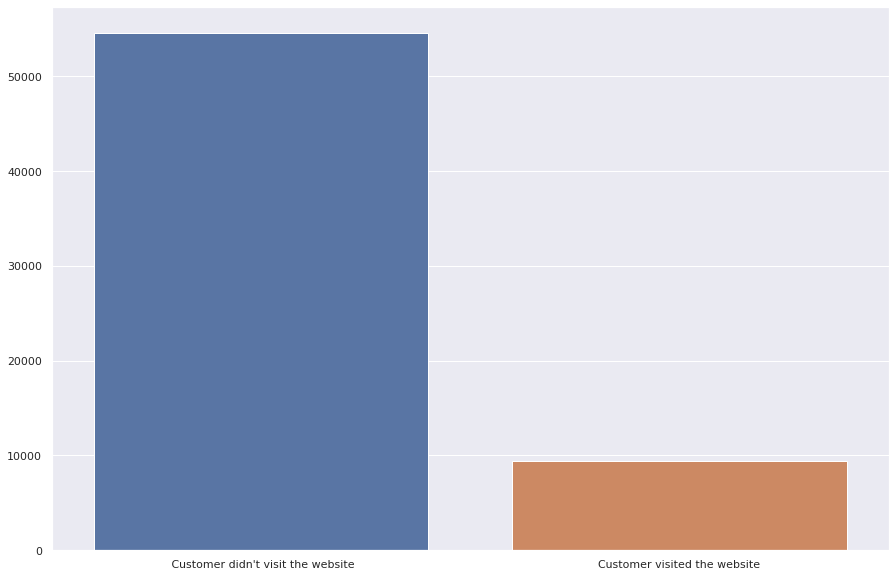

In [0]:
# TARGET VARIABLE- VISIT
# 1/0 INDICATOR, 1 = Customer visited webiste in the following two weeks

df_repr = generate_feature_repr(df['visit'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer visited the website' if x else 
                                        " Customer didn't visit the website")
ax= sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');


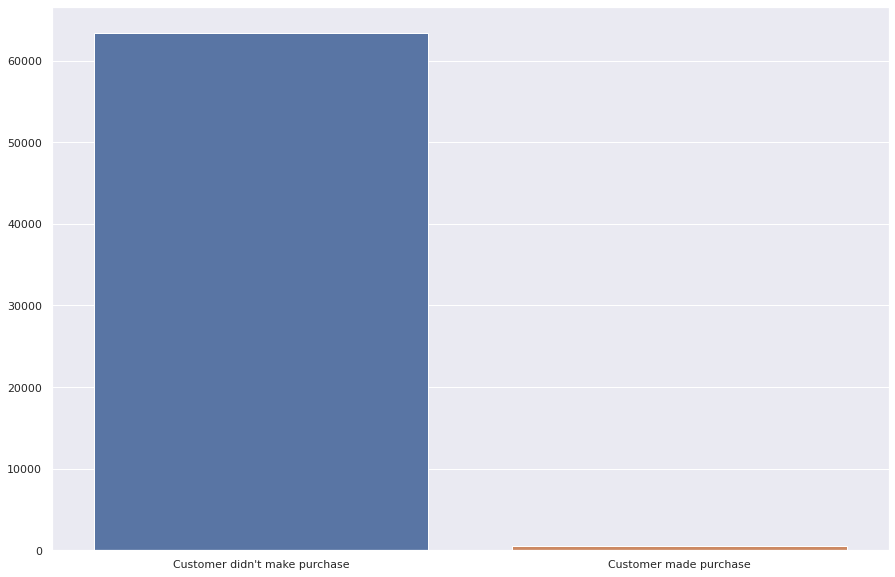

In [0]:
#  Target Variable -Conversion:

df_repr= generate_feature_repr(df['conversion'].values)
df_repr['Name']=df_repr['Name'].apply(lambda x: 'Customer made purchase' if x else "Customer didn't make purchase")
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

From above observation, considering that the conversion rate and actual purchase rate is very small. We use **'Visit'** as our treatment effect outcome target here. 

In [0]:
df.groupby('visit').mean()

,recency,history,mens,womens,newbie,conversion,spend
visit,,,,,,,
0,5.872505,235.163403,0.549647,0.538988,0.517580,0.000000,0.00000
1,5.131467,282.323739,0.559080,0.612093,0.413136,0.061529,7.15969


First glance at how variable 'Segment' (the treatment) is lined to the target variable. 

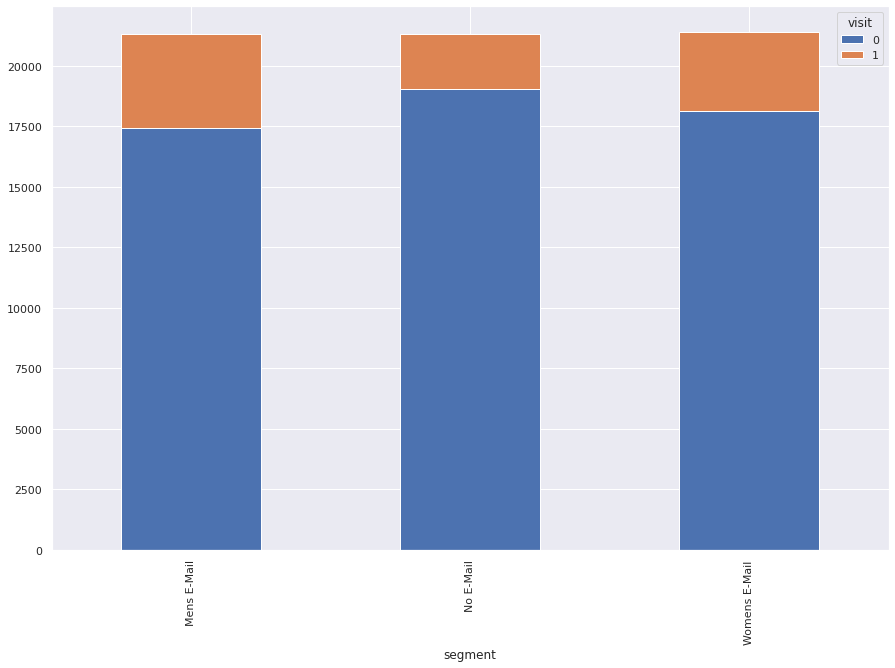

In [0]:
segment=df.groupby(['visit','segment']).size().reset_index().pivot(columns ='visit', index='segment', values=0)
segment.plot(kind='bar', stacked=True);

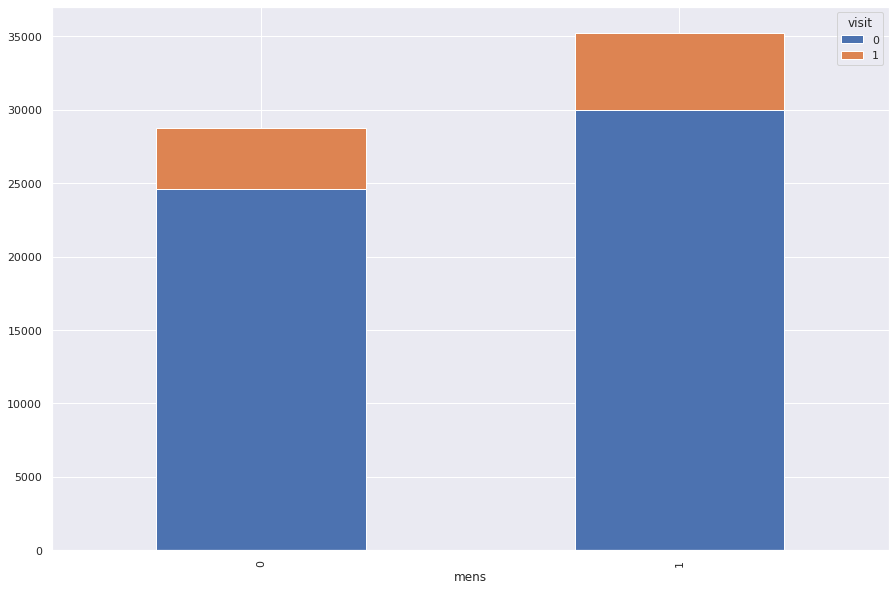

In [0]:
mens=df.groupby(['visit','mens']).size().reset_index().pivot(columns ='visit', index='mens', values=0)
mens.plot(kind='bar', stacked=True);

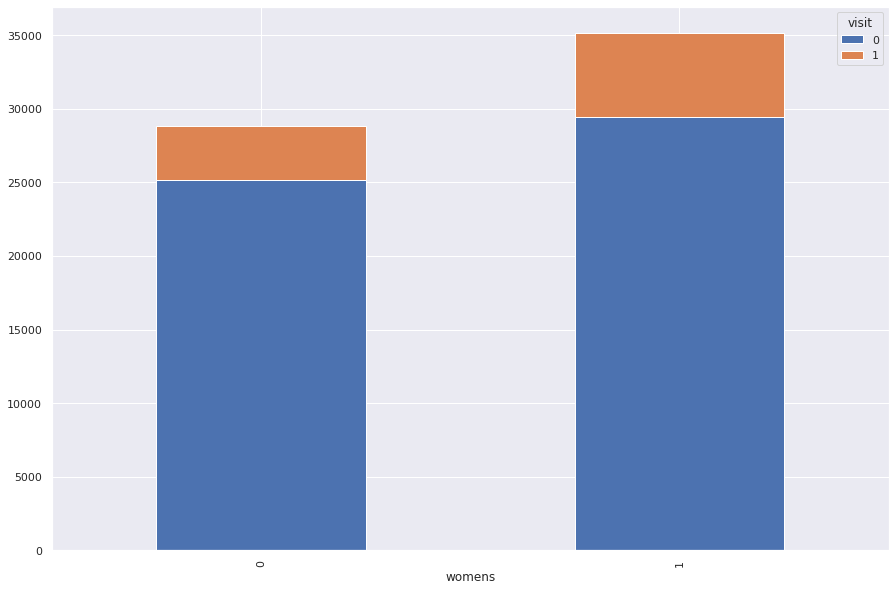

In [0]:
womens=df.groupby(['visit','womens']).size().reset_index().pivot(columns ='visit', index='womens', values=0)
womens.plot(kind='bar', stacked=True);

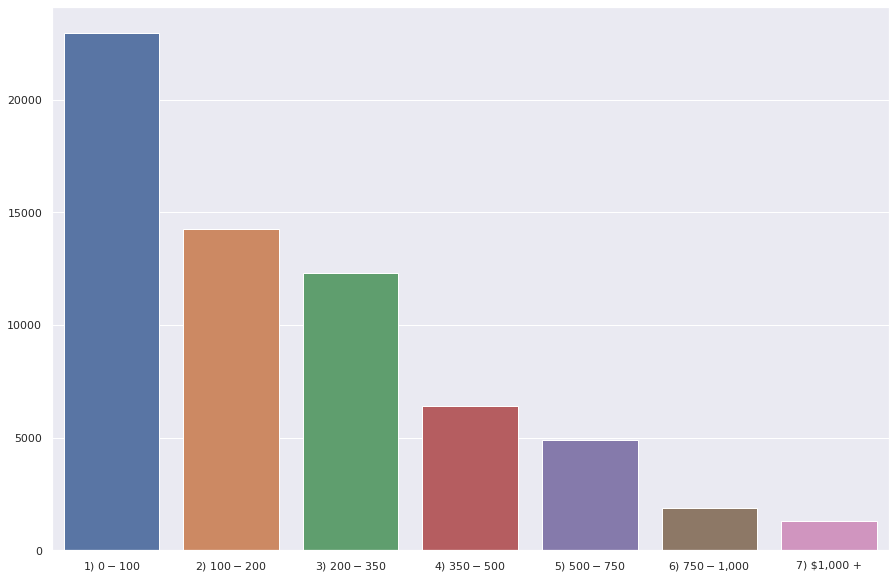

In [0]:
# Inspect Features
# Feature: History_segment

df_repr = generate_feature_repr(df['history_segment'].values)
ax=sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

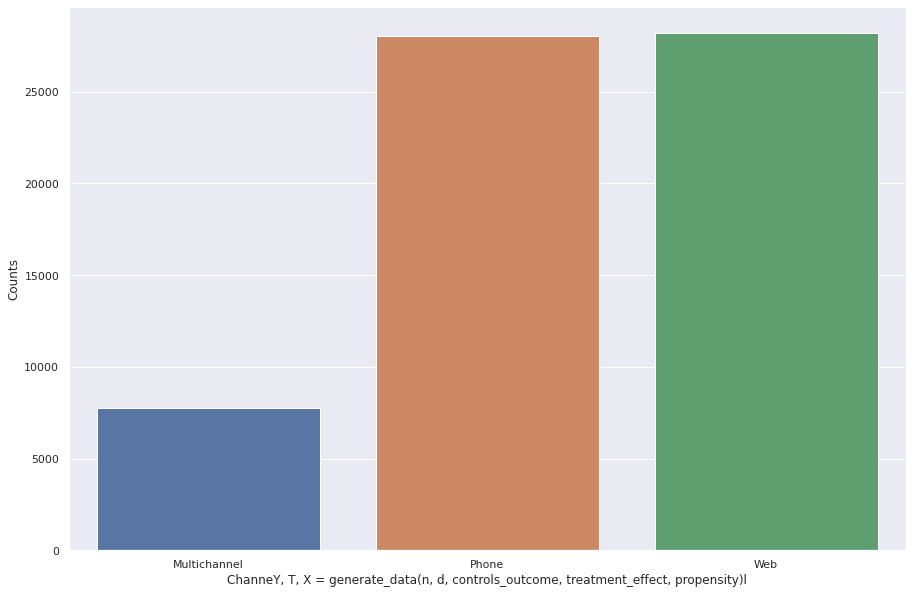

In [0]:
df_repr = generate_feature_repr(df['channel'].values)
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='ChanneY, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)l', ylabel='Counts', title='');

In [0]:
df['history_segment'].head()

0    2) $100 - $200
1    3) $200 - $350
2    2) $100 - $200
3    5) $500 - $750
4      1) $0 - $100
Name: history_segment, dtype: object

 
 **Data Preparation **

In [21]:
# Rename Columns
df=df.rename(columns={'segment':'Treatment'})

# Create dummy columns
dummy_cols= ['zip_code', 'history_segment', 'channel']
for col in dummy_cols:
  df=pd.get_dummies(df, columns=[col], prefix=col)

# Encode the 'Treatment' column

treatment_encoder={'No E-Mail':'Control', 'Mens E-Mail': 'Treatment-Men', 'Womens E-Mail':'Treatment-Women'}
df['Treatment'] = df['Treatment'].apply(lambda x: treatment_encoder[x])
df.head()

,recency,history,mens,womens,newbie,Treatment,visit,conversion,spend,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,Treatment-Women,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6,329.08,1,1,1,Control,0,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,7,180.65,0,1,1,Treatment-Women,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,9,675.83,1,0,1,Treatment-Men,0,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,2,45.34,1,0,0,Treatment-Women,0,0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [0]:
# Data normalization

normalization_fields=['recency','history']
df[normalization_fields]=(df[normalization_fields] - df[normalization_fields].mean())/df[normalization_fields].std()

In [0]:
pd.crosstab(df['Treatment'],df['visit'], margins= True)

visit,0,1,All
Treatment,,,
Control,19044,2262,21306
Treatment-Men,17413,3894,21307
Treatment-Women,18149,3238,21387
All,54606,9394,64000


In [0]:
df.pivot_table(values=['visit', 'conversion','spend'],
               index = 'Treatment',
               aggfunc=[np.mean],
               margins = True)

mean                    
                conversion     spend     visit
Treatment                                     
Control           0.005726  0.652789  0.106167
Treatment-Men     0.012531  1.422617  0.182757
Treatment-Women   0.008837  1.077202  0.151400
All               0.009031  1.050908  0.146781

In [23]:
# To drop the 'conversion' and 'spend' column 
df_red = df.drop(columns=["conversion", "spend"])
df_red.head()
df_red.shape

(64000, 20)

# **Application in CausalML**


In [24]:
# main imports
!pip install causalml
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain
from sklearn.model_selection import train_test_split



# **Run the Uplift Random Forest classifier**
We first fit the uplift random forest classifier using training data. We then use the fitted model to make a prediction using testing data. The prediction returns an ndarray in which each column contains the predicted uplift if the unit was in the corresponding treatment group.

In [0]:
# Split the data into training and testing samples
df_train, df_test = train_test_split(df_red, test_size = 0.3, random_state=123)
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)



In [26]:
# define X (feature)
x_names=list(df_red.drop(columns=['visit','Treatment']))
len(x_names)


18

In [0]:
df_train

,recency,history,mens,womens,newbie,Treatment,visit,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",channel_Multichannel,channel_Phone,channel_Web
0,0.637550,-0.470512,0,1,0,Control,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,0.922646,1.466023,0,1,1,Treatment-Men,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.217738,-0.220432,1,0,1,Control,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,-1.358121,0.456531,0,1,0,Treatment-Women,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1.207742,-0.399774,1,0,0,Treatment-Women,0,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44795,-1.358121,-0.269777,1,0,0,Treatment-Men,0,0,1,0,0,1,0,0,0,0,0,0,0,1
44796,0.922646,-0.572597,0,1,0,Treatment-Men,0,0,1,0,1,0,0,0,0,0,0,0,1,0
44797,-1.358121,1.193028,1,1,1,Control,1,1,0,0,0,0,0,0,1,0,0,1,0,0
44798,-0.217738,0.387667,0,1,0,Treatment-Women,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [0]:
# Fit uplift model
uplift_model =UpliftRandomForestClassifier(control_name='Control')
uplift_model.fit(df_train[x_names].values,
                 treatment=df_train['Treatment'].values,
                 y=df_train['visit'].values)

In [11]:
y_pred = uplift_model.predict(df_test[x_names].values, full_output=False)

# in Dataframe format

result=pd.DataFrame(y_pred, columns=uplift_model.classes_)
result

,Treatment-Men,Treatment-Women
0,0.078172,0.024102
1,0.093352,0.030142
2,0.056866,0.007428
3,0.060823,0.008350
4,0.072911,0.015372
...,...,...
19195,0.055242,0.008876
19196,0.070466,0.009590
19197,0.073945,0.082371
19198,0.081587,0.049754


In the case of multiple treatments the uplift model predicts the uplift for each treatment. 


# **UpliftTree Visualization**

In [0]:
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

from IPython.display import Image

In [0]:
df_train.shape

(44800, 20)

In [0]:
uplift_tree = uplift_model.uplift_forest[0]
uplift_tree.fill(X=df_test[x_names].values, 
                 treatment=df_test['Treatment'].values, 
                 y=df_test['visit'].values) ;

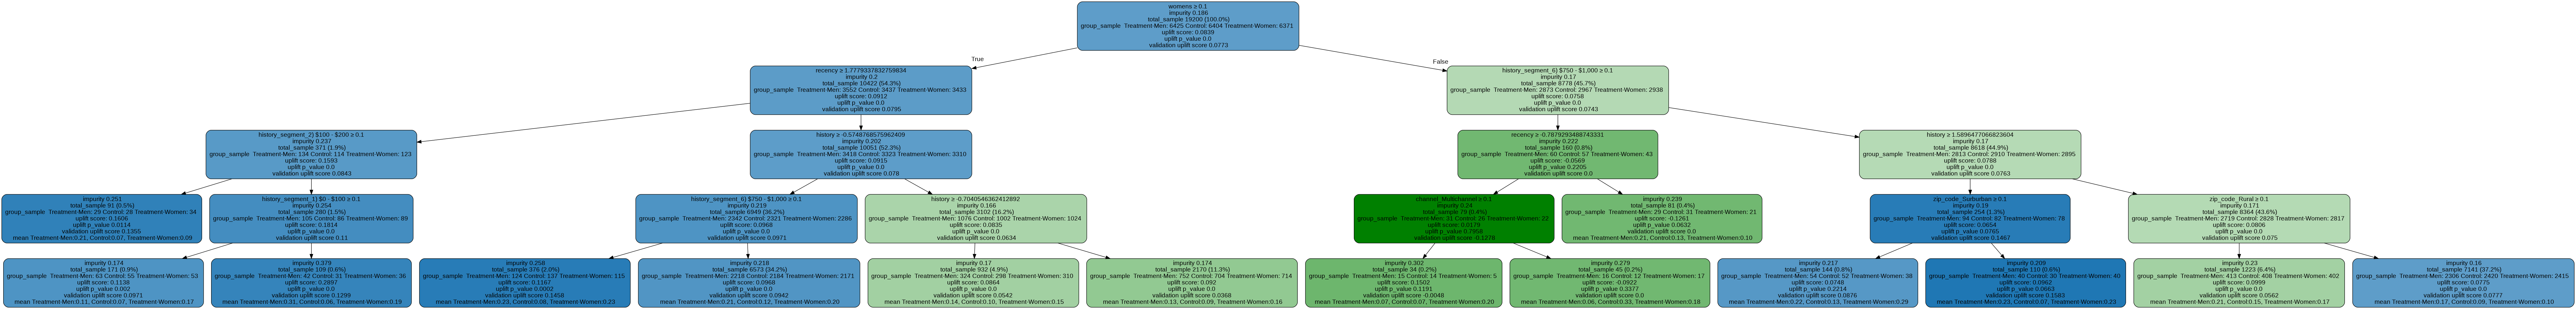

In [15]:
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree,x_names)
Image(graph.create_png())

# **Validation**

In [0]:
result = result.assign(Control=0.0)

max_treatment_key=pd.DataFrame(result.idxmax(axis=1))
max_treatment_key.rename(columns={0:'max_treatment_key'}, inplace=True)
max_treatment_value= pd.DataFrame(result.max(axis=1))
max_treatment_value.rename(columns={0:'max_treatment_value'}, inplace=True)

max_treatment = pd.concat([max_treatment_key, max_treatment_value], axis=1)
max_treatment


,max_treatment_key,max_treatment_value
0,Treatment-Men,0.078172
1,Treatment-Men,0.093352
2,Treatment-Men,0.056866
3,Treatment-Men,0.060823
4,Treatment-Men,0.072911
...,...,...
19195,Treatment-Men,0.055242
19196,Treatment-Men,0.070466
19197,Treatment-Women,0.082371
19198,Treatment-Men,0.081587


In [0]:
result_test = pd.concat([df_test, result, max_treatment], axis=1)

result_test = result_test.loc[:,['Treatment','visit', 
                                 'Treatment-Men', 'Treatment-Women', 
                                 'max_treatment_key', 'max_treatment_value']]

result_test.head(10)

,Treatment,visit,Treatment-Men,Treatment-Women,max_treatment_key,max_treatment_value
0,Treatment-Men,1,0.078172,0.024102,Treatment-Men,0.078172
1,Control,0,0.093352,0.030142,Treatment-Men,0.093352
2,Control,0,0.056866,0.007428,Treatment-Men,0.056866
3,Treatment-Men,0,0.060823,0.008350,Treatment-Men,0.060823
4,Treatment-Women,0,0.072911,0.015372,Treatment-Men,0.072911
5,Treatment-Men,0,0.084418,0.057534,Treatment-Men,0.084418
6,Treatment-Men,1,0.085979,0.034196,Treatment-Men,0.085979
7,Treatment-Women,1,0.082338,0.016998,Treatment-Men,0.082338
8,Treatment-Women,1,0.074660,0.079885,Treatment-Women,0.079885
9,Treatment-Women,0,0.079949,0.016341,Treatment-Men,0.079949


In [0]:
from causalml.metrics import plot,auuc_score

# add one more column treatment_indictor, 0 or 1 (back to binary treatment)
result_test['treatment_indic'] =1
result_test.loc[(result_test['Treatment'] == 'Control'), 'treatment_indic'] =0
result_test

,Treatment,visit,Treatment-Men,Treatment-Women,max_treatment_key,max_treatment_value,treatment_indic
0,Treatment-Men,1,0.078172,0.024102,Treatment-Men,0.078172,1
1,Control,0,0.093352,0.030142,Treatment-Men,0.093352,0
2,Control,0,0.056866,0.007428,Treatment-Men,0.056866,0
3,Treatment-Men,0,0.060823,0.008350,Treatment-Men,0.060823,1
4,Treatment-Women,0,0.072911,0.015372,Treatment-Men,0.072911,1
...,...,...,...,...,...,...,...
19195,Treatment-Women,0,0.055242,0.008876,Treatment-Men,0.055242,1
19196,Control,0,0.070466,0.009590,Treatment-Men,0.070466,0
19197,Treatment-Women,0,0.073945,0.082371,Treatment-Women,0.082371,1
19198,Treatment-Men,0,0.081587,0.049754,Treatment-Men,0.081587,1


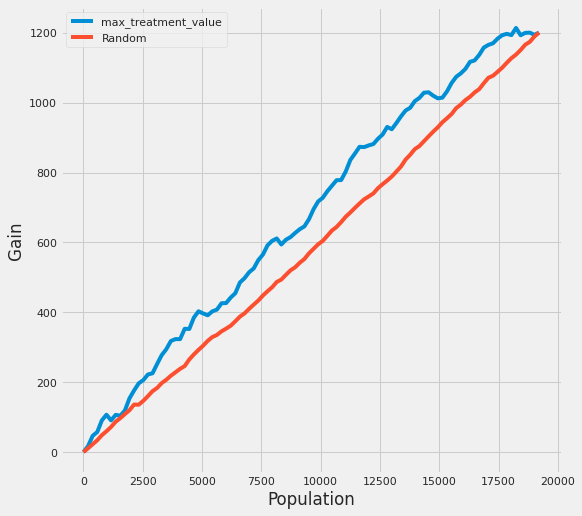

In [0]:
plot_gain(df=result_test.loc[:,['visit','treatment_indic', 'max_treatment_value']], 
     outcome_col='visit', 
     treatment_col='treatment_indic'
    )

CausalML has the plot_gain() function which calculates the uplift curve given a DataFrame containing the treatment assignment, observed outcome and the predicted treatment effect.

The cumulative value of Lift is calculated by comparing when assigned to the treatment group where the maximum 'lift' effect can be expected (blue) and when assigned to control group (red).  
(X-axis: sample size, Y-axis: cumulative Lift value)

# **Application in PyLift**

# **Data Preparation**

In [28]:
!pip install pylift
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import  matplotlib.pyplot as plt
from pylift import TransformedOutcome
pd.set_option('display.max_colwidth', None)

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for pylift: filename=pylift-0.1.5-cp36-none-any.whl size=26030 sha256=7f243df193f3cb8225bbc63169370ff74413dec10811f61612d259c376983f76
  Stored in directory: /root/.cache/pip/wheels/b3/71/23/2587db6f475f0abec88ac2a48dbcf990df7502df94435a8569
Successfully built pylift


In [0]:
df['history_segment'] = df['history_segment'].apply(lambda s: s.split(') ')[1])
df['history_segment'] = df['history_segment'].astype(str)
df['history_segment'] = [i.replace('$', '').replace(',', '').replace('-', '_').replace(' ', '') for i in df['history_segment']]

df = df.rename(columns= {'segment' : 'Treatment'})

# Create dummy columns
dummy_cols = ['zip_code', 'history_segment', 'channel']
for col in dummy_cols:
  df = pd.get_dummies(df, columns=[col], prefix=col)

# Encode the 'Treatment' Column

treatment_encoder = {'No E-Mail': 0, 'Mens E-Mail': 1, 'Womens E-Mail': 2}
df['Treatment'] = df['Treatment'].apply(lambda x: treatment_encoder[x])

#**Treatment and Control Group Selection**

Hillstrom dataset has 2 treatment and 1 control groups annotated respecively:


*   0, No E-Mail
*   1, Mens E-Mail
*   2, Womens E-Mail

To analysie each treatment seperatly we split the data into two subsets accordingly. Since the pylift package requires the treatment to be marked with 1, the entries with value 2 for Woman E-mail have be re-labled

In [32]:
df_woman = df[df['Treatment']!= 1]
df_woman['Treatment'] = np.where(df_woman['Treatment']==2, 1, 0)
df_men = df[df['Treatment']!= 2]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
df_woman['Treatment'].unique()

array([1, 0])

In [34]:
pd.crosstab(df_woman['visit'],df_woman['Treatment'], margins= True)

Treatment,0,1,All
visit,,,
0,19044,18149,37193
1,2262,3238,5500
All,21306,21387,42693


In [35]:
pd.crosstab(df_men['visit'],df_men['Treatment'], margins= True)

Treatment,0,1,All
visit,,,
0,19044,17413,36457
1,2262,3894,6156
All,21306,21307,42613


In [36]:
up_men = TransformedOutcome(df_men, col_treatment='Treatment', col_outcome='visit', stratify=df_men['Treatment'])

up_men.randomized_search(n_iter=20, n_jobs=10, random_state=1)

up_men.shuffle_fit(params=up_men.rand_search_.best_params_, nthread=30, iterations=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed: 14.0min finished


[11:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 0 finished.
[11:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 1 finished.
[11:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 2 finished.
[11:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 3 finished.
[11:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b93e198>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b412278>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b4613c8>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b3643c8>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b36d3c8>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


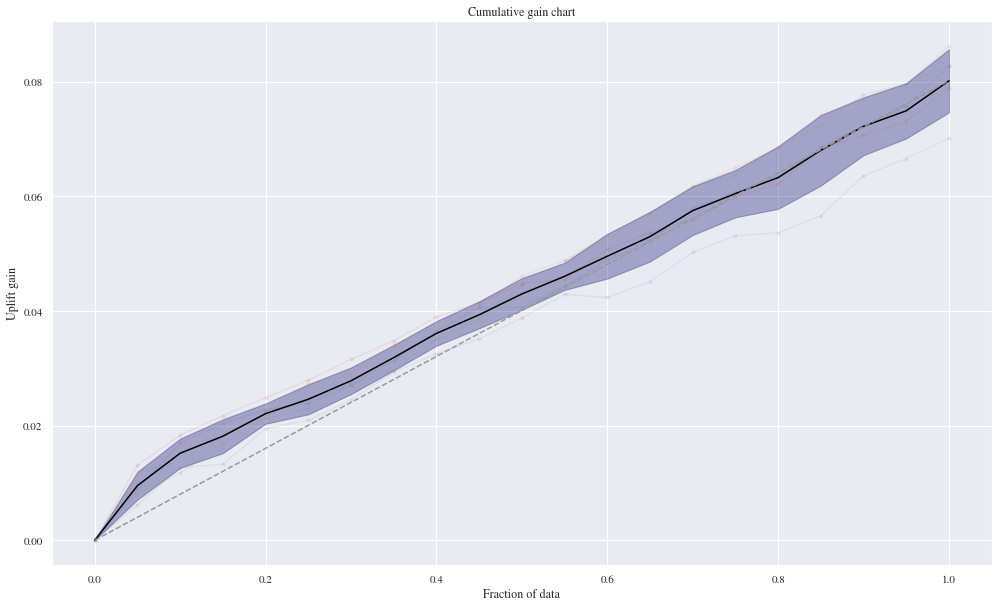

In [37]:

up_men.plot(show_shuffle_fits=True);

In [38]:
up_woman = TransformedOutcome(df_woman, col_treatment='Treatment', col_outcome='visit', stratify=df_woman['Treatment'])

up_woman.randomized_search(n_iter=20, n_jobs=10, random_state=1)

up_woman.shuffle_fit(params=up_men.rand_search_.best_params_, nthread=30, iterations=5)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed: 14.1min finished


[12:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 0 finished.
[12:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 1 finished.
[12:09:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 2 finished.
[12:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 3 finished.
[12:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x7fc767059be0>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x7fc76705d7b8>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x7fc76705d978>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b414c50>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x7fc778864668>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


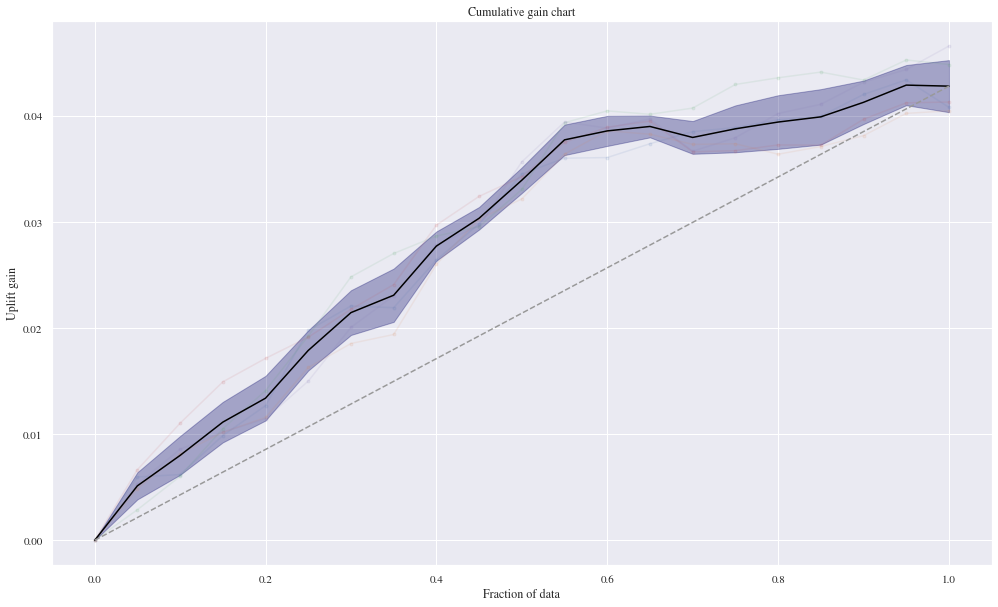

In [39]:
up_woman.plot(show_shuffle_fits=True);


#**Interpretability of the model**

WOE and IV play two distinct roles when analyzing data:

*   WOE describes the relationship between a predictive variable and a binary target variable.
*  IV measures the strength of that relationship. (Generally, if IV<0.05 the variable has very little predictive power and will not add any meaningful predictive power to your model)



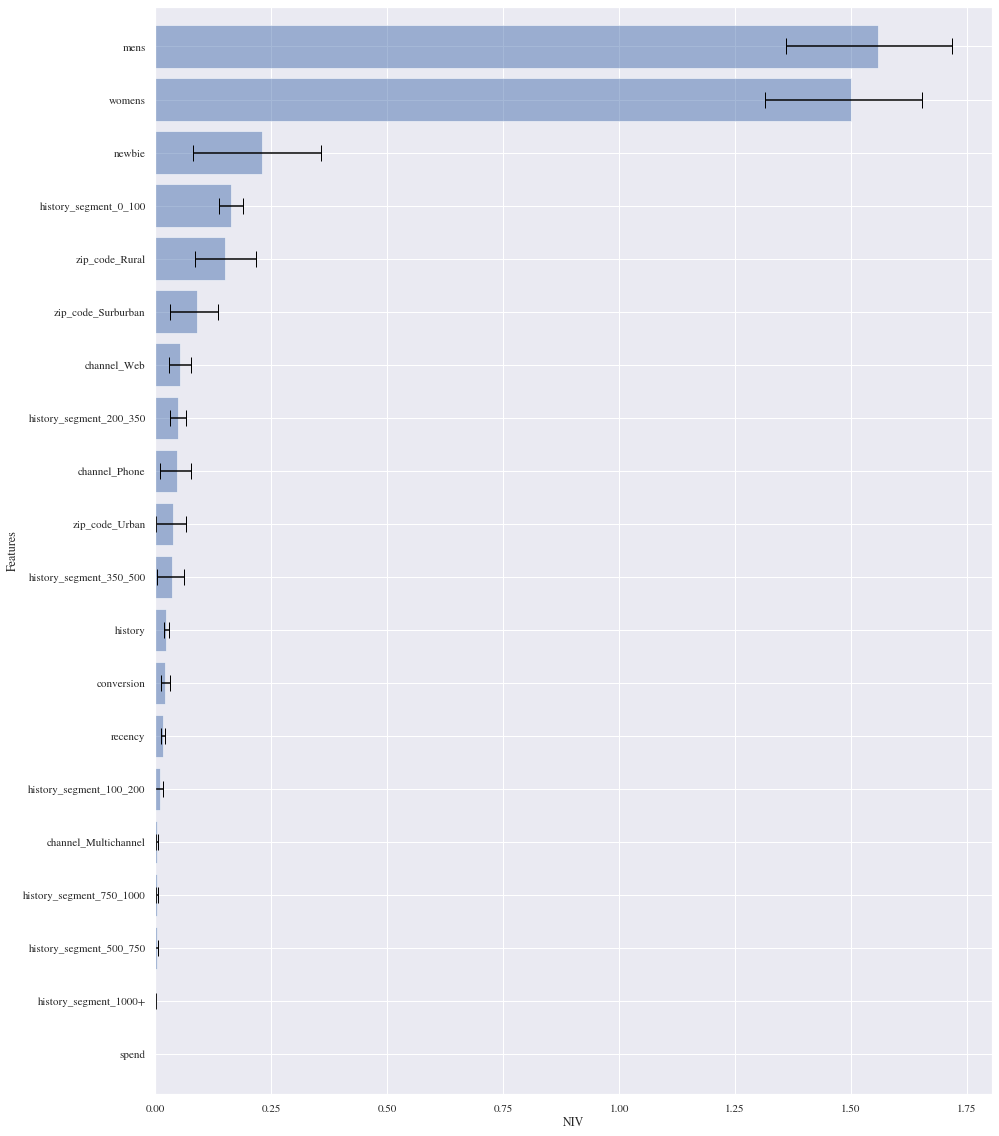

In [0]:
up_woman.NIV()

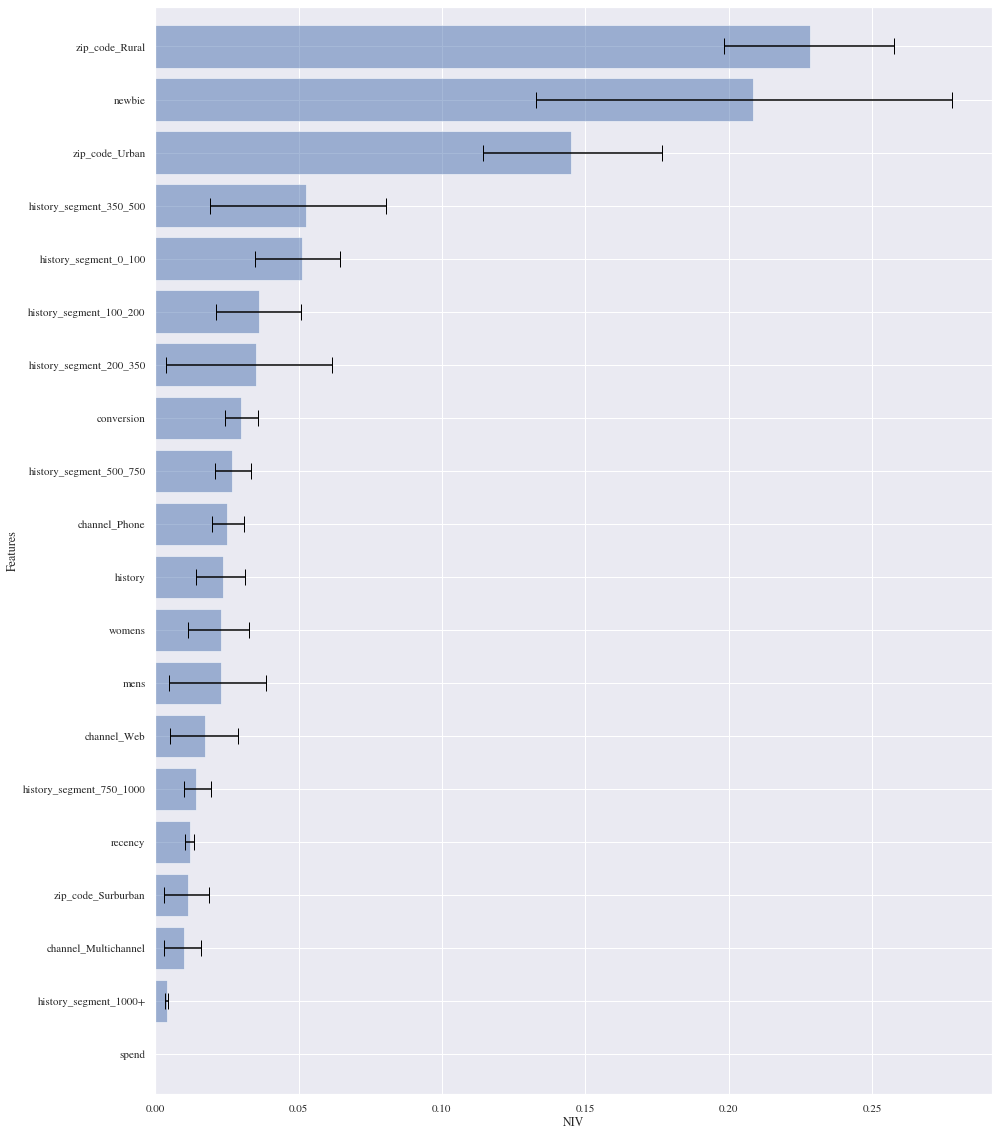

In [0]:
up_men.NIV()